In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# import the IO functions 
import plotly.io as pio
# import low-level API
import plotly.graph_objects as go
# import high-level API
import plotly.express as px 

In [17]:
data = pd.read_csv('./cross-country-literacy-rates.csv')

data.sort_values(by=['Year'], inplace=True)
data.head()

,Entity,Code,Year,Historical and more recent literacy estimates
1853,Spain,ESP,1475,3.0
726,Germany,DEU,1475,9.0
1608,Poland,POL,1475,0.0
1381,Netherlands,NLD,1475,17.0
1943,Sweden,SWE,1475,1.0


In [18]:
# sadly, not all countries have data for all years
# we want to find out how many countries have data for each year

# count the number of countries with a data point for each year
country_count_per_year = data.groupby('Year')['Entity'].nunique()

country_count_per_year.tail(10)

Year
2013     47
2014     84
2015    170
2016     45
2017     45
2018     52
2019     42
2020     43
2021     55
2022     58
Name: Entity, dtype: int64

In [19]:
# next we want to find out which countries are missing in each year

# first, we find all unique countries in the dataset
all_countries = set(data['Entity'].unique())

# now, for each year, we will find which countries are missing
missing_countries_per_year = {}
for year in data['Year'].unique():
    countries_in_year = set(data[data['Year'] == year]['Entity'])
    missing_countries = all_countries - countries_in_year
    missing_countries_per_year[year] = missing_countries

# converting the result to a more readable format (sorted by year)
missing_countries_per_year_sorted = dict(sorted(missing_countries_per_year.items()))

missing_countries_per_year_sorted[2015]

{'American Samoa',
 'Andorra',
 'Anguilla',
 'Antigua and Barbuda',
 'Arab World',
 'Australia',
 'Austria',
 'Bahamas',
 'Barbados',
 'Belgium',
 'Bermuda',
 'British Virgin Islands',
 'Canada',
 'Caribbean small states',
 'Cayman Islands',
 'Central Europe and the Baltics',
 'Cook Islands',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD)',
 'East Asia & Pacific (excluding high income)',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD)',
 'Europe & Central Asia (excluding high income)',
 'Fiji',
 'Finland',
 'Fragile and conflict affected situations',
 'France',
 'French Polynesia',
 'Germany',
 'Gibraltar',
 'Greenland',
 'Grenada',
 'Heavily indebted poor countries (HIPC)',
 'Hong Kong',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Iceland',
 'Ireland',
 'Israel',
 'Japan',
 'Kosovo',
 'Late-demographic dividend',
 'Latin America & Caribbean',
 '

In [20]:
# To combine the data such that each country has a datapoint using the latest available year, 
# we'll use the latest entry for each country

# Getting the latest entry for each country
latest_data_per_country = data.sort_values('Year').groupby('Entity').last().reset_index()

latest_data_per_country.head()

,Entity,Code,Year,Historical and more recent literacy estimates
0,Afghanistan,AFG,2021,37.26604
1,Albania,ALB,2022,98.50000
2,Algeria,DZA,2018,81.40784
3,American Samoa,ASM,1980,97.34416
4,Andorra,AND,2011,100.00000


In [21]:
# To calculate the increase in literacy rate for each country, we need to find the earliest and latest data points for each country
# and then compute the difference

earliest_data_per_country = data.sort_values('Year').groupby('Entity').first().reset_index()

# Merging the earliest and latest data
earliest_latest_data = pd.merge(earliest_data_per_country, latest_data_per_country, on='Entity', suffixes=('_earliest', '_latest'))

earliest_latest_data['Literacy_Rate_Increase'] = earliest_latest_data['Historical and more recent literacy estimates_latest'] - earliest_latest_data['Historical and more recent literacy estimates_earliest']

earliest_latest_data.head(50)


,Entity,Code_earliest,Year_earliest,Historical and more recent literacy estimates_earliest,Code_latest,Year_latest,Historical and more recent literacy estimates_latest,Literacy_Rate_Increase
0,Afghanistan,AFG,1979,18.15768,AFG,2021,37.266040,19.108360
1,Albania,ALB,2001,98.71298,ALB,2022,98.500000,-0.212980
2,Algeria,DZA,1987,49.63088,DZA,2018,81.407840,31.776960
3,American Samoa,ASM,1980,97.34416,ASM,1980,97.344160,0.000000
4,Andorra,AND,2011,100.00000,AND,2011,100.000000,0.000000
5,Angola,AGO,2001,67.40542,AGO,2022,72.400000,4.994580
6,Anguilla,AIA,1984,95.00000,AIA,1984,95.000000,0.000000
7,Antigua and Barbuda,ATG,2001,98.95000,ATG,2014,98.950000,0.000000
8,Arab World,None,1990,54.59347,None,2010,77.364586,22.771116
9,Arab World (WB),None,1978,46.47531,None,2022,75.171530,28.696220


In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world


C:\Users\David\AppData\Local\Temp\ipykernel_24080\2333073256.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [23]:
merged = world.merge(latest_data_per_country, left_on='iso_a3', right_on='Code')
merged


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Entity,Code,Year,Historical and more recent literacy estimates
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,2003,93.70000
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2022,82.02000
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2003,99.00000
3,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,2003,99.00000
4,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KAZ,2020,99.80000
...,...,...,...,...,...,...,...,...,...,...
165,2083459.0,Europe,North Macedonia,MKD,12547,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,MKD,2015,97.84376
166,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,SRB,2019,99.48253
167,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,MNE,2021,98.98000
168,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,TTO,2015,98.96958


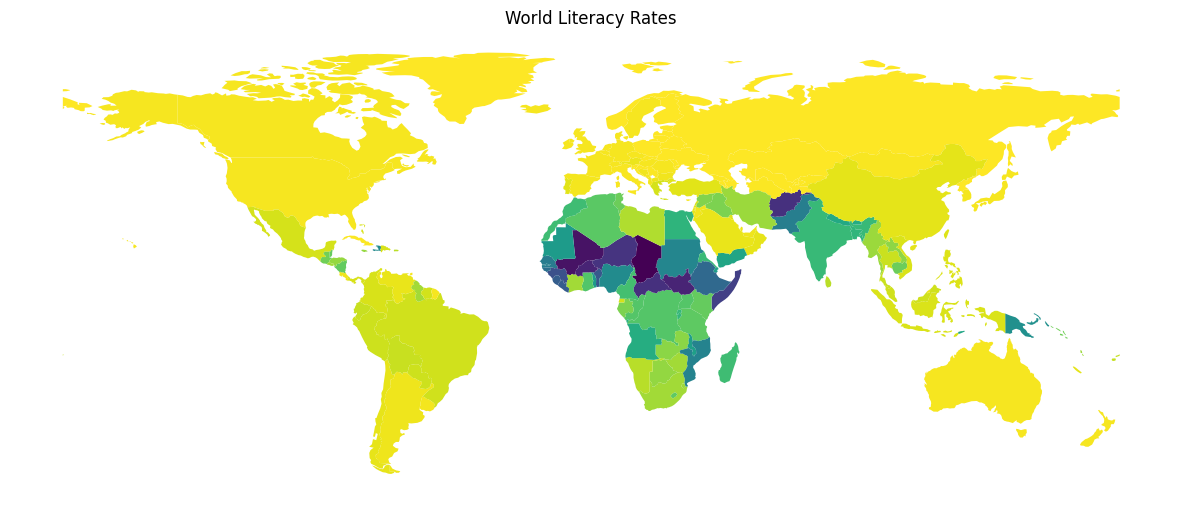

In [24]:
# plot using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Historical and more recent literacy estimates', ax=ax, legend=False,
            legend_kwds={'label': "Literacy Rate (%)",
                         'orientation': "horizontal"})

ax.set_title('World Literacy Rates')
ax.set_axis_off()

In [25]:
# plot using plotly
# version 1: animated

fig = px.choropleth(data, locations="Code",
                    color="Historical and more recent literacy estimates",
                    hover_name="Entity",
                    color_continuous_scale=px.colors.sequential.Sunset,
                    width=2000, height=1000,
                    labels={'Historical and more recent literacy estimates':'Literacy Rate (%)'},
                    animation_frame="Year")

fig.show()

In [26]:
# plot using plotly
# version 1: static using the latest data animated

fig = px.choropleth(latest_data_per_country, locations="Code",
                    color="Historical and more recent literacy estimates",
                    hover_name="Entity",
                    hover_data=['Year'],
                    color_continuous_scale=px.colors.sequential.Sunset,
                    width=2000, height=1000,
                    labels={'Historical and more recent literacy estimates':'Literacy Rate (%)'})

fig.show()